<h1 align="center">P4DS - Final Project</h1>
<p align="center">
  <a href="https://github.com/viplazylmht">
    <img src="https://img.shields.io/badge/18120339-viplazylmht-brightgreen.svg">
  </a>
  <a href="https://github.com/vohieu00">
    <img src="https://img.shields.io/badge/18120379-vohieu00-brightgreen.svg">
  </a>
  <a href="https://github.com/viplazylmht/P4DS_final">
    <img src="https://img.shields.io/badge/Github-131313?logo=github&logoColor=white">
  </a>
</p>
<svg width="100" height="50" xmlns="http://www.w3.org/2000/svg"></svg>

<h2>Contributors & References</h2>

| STT | Họ và Tên | MSSV | Git
|:-:|:-|:-:|:-:
| Nhóm | Hà Văn Duy | 18120339 | [viplazylmht](https://github.com/viplazylmht)
| 20 | Võ Thị Hiếu | 18120379 | [vohieu00](https://github.com/vohieu00)

Data informations:

- Dataset Description: [health.data.ny.gov](https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/82xm-y6g8)  

- Kaggle: [2015 de-identified NY inpatient discharge (SPARCS)](https://www.kaggle.com/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs)



<!-- **Sơ nét về dữ liệu** -->
Tập dữ liệu được công khai bởi sở Y tế bang New York, chứa thông tin chi tiết về bệnh nhân khi xuất viện nhưng không chứa thông tin xác định danh tính.

# Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Thu thập dữ liệu

## Tải tập dữ liệu

In [ ]:
!gdown -q --id 1UKxIYjWw6sPuITsv6RjgNsEFpx3vMJNX
!unzip -o 2015-deidentified-ny-inpatient-discharge-sparcs.zip

Archive:  2015-deidentified-ny-inpatient-discharge-sparcs.zip
  inflating: Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv  


In [ ]:
!ls

2015-deidentified-ny-inpatient-discharge-sparcs.zip		sample_data
Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv


## Đọc dữ liệu

In [ ]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')
df.sample(5, random_state=42)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
653914,Capital/Adiron,Warren,5601000.0,1005.0,Glens Falls Hospital,70 or Older,128,M,White,Not Span/Hispanic,6,Emergency,Skilled Nursing Home,2015,123,Influenza,0,NO PROC,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,2,Moderate,Moderate,Medical,Medicare,NaN,NaN,144621.0,NaN,NaN,0,N,Y,$28022.46,$11078.51
104569,Western NY,Erie,1401013.0,218.0,Sisters of Charity Hospital,50 to 69,142,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,2015,146,Diverticulosis and diverticulitis,78,COLORECTAL RESECTION,221,Major small & large bowel procedures,6,Diseases and Disorders of the Digestive System,2,Moderate,Minor,Surgical,Private Health Insurance,NaN,NaN,216653.0,216653.0,NaN,0,N,N,$27504.66,$14155.67
1129243,New York City,Kings,7001003.0,1288.0,Brooklyn Hospital Center - Downtown Campus,70 or Older,112,M,Black/African American,Unknown,6,Emergency,Home w/ Home Health Services,2015,112,Transient cerebral ischemia,193,DX ULTRASOUND HEART,47,Transient ischemia,1,Diseases and Disorders of the Nervous System,2,Moderate,Moderate,Medical,Medicare,Medicare,Medicaid,214410.0,233966.0,NaN,0,N,Y,$64164.39,$20277.91
693749,Hudson Valley,Dutchess,1302001.0,181.0,Vassar Brothers Medical Center,50 to 69,125,M,White,Not Span/Hispanic,4,Emergency,Home w/ Home Health Services,2015,55,Fluid and electrolyte disorders,58,HEMODIALYSIS,425,Electrolyte disorders except hypovolemia related,10,"Endocrine, Nutritional and Metabolic Diseases ...",3,Major,Moderate,Medical,Medicare,Federal/State/Local/VA,NaN,220486.0,220486.0,NaN,0,N,Y,$33460.18,$8808.44
83332,Western NY,Erie,1401008.0,213.0,Mercy Hospital of Buffalo,30 to 49,142,M,White,Not Span/Hispanic,2,Emergency,Left Against Medical Advice,2015,152,Pancreatic disorders (not diabetes),0,NO PROC,282,Disorders of pancreas except malignancy,7,Diseases and Disorders of the Hepatobiliary Sy...,2,Moderate,Moderate,Medical,Medicaid,Medicaid,NaN,206544.0,NaN,NaN,0,N,Y,$7953.86,$3361.40


# Khám phá dữ liệu

In [ ]:
df.shape

(2346760, 37)

Tập dữ liệu có 2 346 760 mẫu với 37 thuộc tính, trong đó có 3 thuộc tính không có trong bộ dữ liệu gốc được  đó là Attending Provider License Number, Operating Provider License Number và Other Provider License Number.  

Trong đó, mỗi dòng dữ liệu là một bản ghi của một trường hợp bệnh nhân nhập và nằm viện. Các bản ghi này đã được loại bỏ các thông tin cá nhân và thời điểm nhấp viện nhằm đảm bảo quyền riêng tư.

## Chi tiết thuộc tính

| Thuộc tính | Mô tả
|:-|:-
| Health Service Area | vị trí bệnh viện (Capital / Adirondack, Central NY, Finger Lakes, Hudson Valley,...)
| Hospital County |  tên quận nơi đặt bệnh viện. 
|Facility Id | ID cơ sở y tế
|Facility Name | tên cơ sở y tế
|Age Group | nhóm tuổi của bệnh nhân, được tính tại thời điểm xuất viện( $\leq$ 17, 18-29, 30-49, 50-69 và $\geq$ 70)
|Zip Code - 3 digits | 3 chữ số đầu tiên của mã bưu chính của bệnh nhân
|Gender | giới tính
|Race | chủng tộc (Black/African, American, ...)
|Ethnicity  | dân tộc 
|Length of Stay  | số ngày từ ngày nhập viện-xuất viện, tối đa 120 ngày
|Type of Admission  | hình thức nhập viện (tự chọn, cấp cứu, ...)
|Patient Disposition |  tình trạng bệnh nhân khi xuất viện
|Discharge Year  | năm xuất viện  
|CCS Diagnosis Code   |  mã chẩn đoán phân loại lâm sàn CCS 
|CCS Diagnosis Description  | mô tả danh mục chẩn đoán lâm sàn CCS 
|CCS Procedure Code  |  mã thủ tục CCS  
|CCS Procedure Description  | mô tả thủ tục CCS 
|APR DRG Code | mã APR DRG (all patient refinded diagnosis related group)
|APR DRG Description  | mô tả mã phân loại APR DRG 
|APR MDC Code | mã phân loại APR MDC (all patient refind major diagnostic category)
|APR MDC Description  |  mô tả phân loại APR MDC
|APR Severity of Illness Code | mã mức độ nghiêm trọng của bệnh tật chuẩn APR-DRG 
|APR Severity of Illness Description | mô tả mức độ nghiêm trọng của bệnh 
|APR Risk of Mortality   |  nguy cơ tử vong (nhỏ :1, vừa 2: lớn:3 , khẩn cấp:4)
|APR Medical Surgical Description | mô tả APR-DRG về phẫu thuật, y tế,...
|Payment Typology x  |  hình thức thanh toán x
|Operating Certificate Number| giấy phép hoạt động của cơ sở y tế
|Attending Provider License Number | giấy phép tham gia
|Operating Provider License Number  | giấy phép vận hành
|Other Provider License Number | một số giấy phép khác
|Birth Weight  |  trọng lượng lúc mới sinh, tính bằng gam
|Abortion Edit Indicator   | cho biết lúc xuất viện có dấu hiệu thực hiện phá thai hay không
|Emergency Department Indicator  | chỉ báo khoa cấp cứu (nếu có mã của bộ phận cấp cứu 045X thì sẽ đặt là Y, ngược lại N)
|Total Charges  | tổng viện phí 
|Total Costs  | tổng chi phí|


**Chú thích**  
  - [Column descriptions](https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/82xm-y6g8)
  - [APR DRG](https://www.hcup-us.ahrq.gov/db/nation/nis/APR-DRGsV20MethodologyOverviewandBibliography.pdf)
  - [APR MDC](https://en.wikipedia.org/wiki/Major_Diagnostic_Category)

    *Đối với các vụ phá thai, hồ sơ sẽ để trống nhiều chi tiết như khu vực, cơ sở thực hiện, ...*

## Dữ liệu khuyết

In [ ]:
df.isna().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

Dữ liệu bị khuyết ở các cột:  
- Health Service Area
- Hospital County
- Operating Certificate Number
- Facility Id, Zip Code - 3 digits
- APR Severity of Illness Description
- APR Risk of Mortality
- Payment Typology 2
- Payment Typology 3
- Attending Provider License Number
- Operating Provider License Number
- Other Provider License Number


## Kiểu dữ liệu mỗi cột

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346760 entries, 0 to 2346759
Data columns (total 37 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

Xem thử các thuộc tính hiện tại đang là kiểu dữ liệu số. 

In [ ]:
df.select_dtypes(exclude='object').sample(5, random_state=42)

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight
653914,5601000.0,1005.0,2015,123,0,139,4,2,144621.0,NaN,NaN,0
104569,1401013.0,218.0,2015,146,78,221,6,2,216653.0,216653.0,NaN,0
1129243,7001003.0,1288.0,2015,112,193,47,1,2,214410.0,233966.0,NaN,0
693749,1302001.0,181.0,2015,55,58,425,10,3,220486.0,220486.0,NaN,0
83332,1401008.0,213.0,2015,152,0,282,7,2,206544.0,NaN,NaN,0


Xem thử các thuộc tính hiện tại đang có kiểu dữ liệu không phải số.

In [ ]:
df.select_dtypes(include='object').sample(3, random_state=42)

,Health Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
653914,Capital/Adiron,Warren,Glens Falls Hospital,70 or Older,128,M,White,Not Span/Hispanic,6,Emergency,Skilled Nursing Home,Influenza,NO PROC,Other pneumonia,Diseases and Disorders of the Respiratory System,Moderate,Moderate,Medical,Medicare,NaN,NaN,N,Y,$28022.46,$11078.51
104569,Western NY,Erie,Sisters of Charity Hospital,50 to 69,142,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,Diverticulosis and diverticulitis,COLORECTAL RESECTION,Major small & large bowel procedures,Diseases and Disorders of the Digestive System,Moderate,Minor,Surgical,Private Health Insurance,NaN,NaN,N,N,$27504.66,$14155.67
1129243,New York City,Kings,Brooklyn Hospital Center - Downtown Campus,70 or Older,112,M,Black/African American,Unknown,6,Emergency,Home w/ Home Health Services,Transient cerebral ischemia,DX ULTRASOUND HEART,Transient ischemia,Diseases and Disorders of the Nervous System,Moderate,Moderate,Medical,Medicare,Medicare,Medicaid,N,Y,$64164.39,$20277.91


Quan sát sơ phân phối dữ liệu và từ mô tả dữ liệu, ta thấy dữ liệu đọc được đang bị sai kiểu dữ liệu ở một vài nơi:  

- Cột Total Charges, Total Costs và Length of Stay nên có kiểu dữ liệu là numeric thay vì object.  
- Các cột Operating Certificate Number, Facility Id, CCS Diagnosis Code, CCS Procedure Code, APR DRG Code, APR MDC Code, APR Severity of Illness Code là dữ liệu phân loại, cho nên cũng nên được chuyển sang biểu diễn dưới dạng object.
- Cột Attending Provider License Number, Operating Provider License Number, Other Provider License Number nên có kiểu dữ liệu là object.  

# Chọn dữ liệu

## Chuyển đổi kiểu dữ liệu phù hợp

Đối với 2 cột `Total Charges` và `Total Costs`, trước khi chuyển nó về kiểu dữ liệu số, ta sẽ loại bỏ kí tự `$` đại diện cho đơn vị tiền tệ ở trước đi.  

In [ ]:
def convert_to_numeric(Sr):
    Sr = Sr.map(lambda x:x[1:])
    Sr = pd.to_numeric(Sr)
    return Sr

df['Total Charges'] = convert_to_numeric(df['Total Charges'])
df['Total Costs'] = convert_to_numeric(df['Total Costs'])

Theo như mô tả của cột `Length of Stay`, những người nhập viện lớn hơn 120 ngày sẽ được kí hiệu là `120 +`, tuy nhiên để tiện cho việc chuyển đổi về cột dữ liệu số, ta sẽ coi như lớn hơn 120 ngày là 120 ngày.

In [ ]:
lof_fixed = df['Length of Stay'].replace('120 +', '120')
df['Length of Stay'] = lof_fixed.astype('int')

Đối với các cột định danh còn lại, ta chỉ việc chuyển về dạng chuỗi.

In [ ]:
cate_list = ['Operating Certificate Number', 'Facility Id', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'Attending Provider License Number', 'Operating Provider License Number', 'Other Provider License Number']
cate_dict = {col:'str' for col in cate_list}

df = df.astype(cate_dict)

In [ ]:
df.dtypes 

Health Service Area                     object
Hospital County                         object
Operating Certificate Number            object
Facility Id                             object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                      object
CCS Diagnosis Description               object
CCS Procedure Code                      object
CCS Procedure Description               object
APR DRG Code                            object
APR DRG Description                     object
APR MDC Code                            object
APR MDC Descr

Kiểm tra lại thấy kiểu dữ liệu đã đúng.

Bước này ta sẽ tách bộ dữ liệu ra thành 2 nhóm riêng để dễ dàng phân tích và tiền xử lý.

In [ ]:
nume_feature = df.select_dtypes(exclude='object')
cate_feature = df.select_dtypes(include='object');

In [ ]:
pd.set_option('display.max_colwidth', 200)
def missing_ratio(df):
    return round(df.isna().sum() * 100 / len(df), 2)
def count(df):
    return df.nunique()
def value(df):
    return dict((df.value_counts(normalize=True) * 100).round(2))

In [ ]:
nume_profile = nume_feature.describe().round(2)
missing_inf = pd.DataFrame(df[nume_feature.columns].apply(missing_ratio), columns=["missing_ratio"]).T
nume_profile = pd.concat([nume_profile, missing_inf])
nume_profile.T

,count,mean,std,min,25%,50%,75%,max,missing_ratio
Length of Stay,2346760.0,5.48,8.03,1.00,2.00,3.00,6.00,120.00,0.0
Discharge Year,2346760.0,2015.00,0.00,2015.00,2015.00,2015.00,2015.00,2015.00,0.0
Birth Weight,2346760.0,326.43,1000.15,0.00,0.00,0.00,0.00,9900.00,0.0
Total Charges,2346760.0,43205.62,80438.95,0.01,12027.05,23480.88,46606.66,7248390.82,0.0
Total Costs,2346760.0,15984.84,32383.60,0.00,4724.15,8791.39,16834.67,5236614.76,0.0


In [ ]:
cate_profile = cate_feature.agg([missing_ratio, count, value])
cate_profile.T

,missing_ratio,count,value
Health Service Area,0.12,8,"{'New York City': 46.6, 'Long Island': 14.48, 'Hudson Valley': 10.49, 'Capital/Adiron': 7.14, 'Western NY': 6.99, 'Central NY': 6.76, 'Finger Lakes': 6.25, 'Southern Tier': 1.29}"
Hospital County,0.12,57,"{'Manhattan': 17.11, 'Kings': 10.62, 'Queens': 8.41, 'Bronx': 8.03, 'Nassau': 7.73, 'Suffolk': 6.75, 'Erie': 5.14, 'Westchester': 5.09, 'Monroe': 4.49, 'Onondaga': 3.34, 'Albany': 2.8, 'Richmond':..."
Operating Certificate Number,0,180,"{'7002054.0': 5.02, '7000006.0': 3.8, '7002024.0': 2.73, '7003004.0': 2.66, '1401014.0': 2.32, '2951001.0': 2.19, '7002053.0': 1.92, '7002002.0': 1.9, '7001020.0': 1.79, '7004003.0': 1.76, '700102..."
Facility Id,0,214,"{'1456.0': 2.38, '541.0': 2.03, '1464.0': 2.02, '1458.0': 1.83, '1169.0': 1.82, '1305.0': 1.79, '1630.0': 1.74, '1306.0': 1.71, '413.0': 1.65, '1.0': 1.55, '245.0': 1.5, '511.0': 1.49, '1439.0': 1..."
Facility Name,0,215,"{'Mount Sinai Hospital': 2.38, 'North Shore University Hospital': 2.03, 'New York Presbyterian Hospital - Columbia Presbyterian Center': 2.02, 'New York Presbyterian Hospital - New York Weill Corn..."
Age Group,0,5,"{'50 to 69': 27.48, '70 or Older': 27.42, '30 to 49': 19.54, '0 to 17': 15.02, '18 to 29': 10.53}"
Zip Code - 3 digits,0.19,50,"{'112': 13.39, '104': 9.61, '117': 7.77, '100': 7.26, '113': 5.19, '114': 3.9, '115': 3.79, 'OOS': 2.87, '142': 2.82, '103': 2.66, '105': 2.64, '109': 2.53, '146': 2.4, '125': 1.98, '140': 1.87, '..."
Gender,0,3,"{'F': 55.72, 'M': 44.28, 'U': 0.0}"
Race,0,4,"{'White': 56.88, 'Other Race': 23.2, 'Black/African American': 18.96, 'Multi-racial': 0.95}"
Ethnicity,0,4,"{'Not Span/Hispanic': 83.28, 'Spanish/Hispanic': 11.87, 'Unknown': 4.47, 'Multi-ethnic': 0.37}"


## Lấy các thuộc tính hữu ích để phân tích

Ta bỏ thuộc tính `Other Provider License Number` vì độ khuyết dữ liệu quá lớn. Ta cũng loại bỏ một số thuộc tính có yếu tố "Descripion" và một số thuộc tính khác.  


In [ ]:
del_columns = ["Other Provider License Number", "CCS Diagnosis Description", "CCS Procedure Description",
               "APR DRG Description", "APR MDC Description", "Facility Name", "APR Risk of Mortality",
               "Attending Provider License Number", "Operating Provider License Number", "Health Service Area", "Race",
               "APR Severity of Illness Description", "Hospital County", "Ethnicity", "Operating Certificate Number"]
columns = sorted(set(df.columns) - set(del_columns))

**Các thuộc tính dùng để phân tích:**  
- Facility Id
- Discharge Year
- Zip Code - 3 digits
- CCS Diagnosis Code
- CCS Procedure Code
- APR DRG Code
- APR MDC Code
- APR Severity of Illness Code
- Birth Weight
- Age Group
- Gender
- Length of Stay
- Type of Admission
- Patient Disposition
- APR Medical Surgical Description
- APR Severity of Illness Description
- Payment Typology 1
- Payment Typology 2
- Payment Typology 3
- Abortion Edit Indicator
- Emergency Department Indicator
- Total Charges
- Total Costs

In [ ]:
data = df[columns]
data.sample(3, random_state=42)

,APR DRG Code,APR MDC Code,APR Medical Surgical Description,APR Severity of Illness Code,Abortion Edit Indicator,Age Group,Birth Weight,CCS Diagnosis Code,CCS Procedure Code,Discharge Year,Emergency Department Indicator,Facility Id,Gender,Length of Stay,Patient Disposition,Payment Typology 1,Payment Typology 2,Payment Typology 3,Total Charges,Total Costs,Type of Admission,Zip Code - 3 digits
653914,139,4,Medical,2,N,70 or Older,0,123,0,2015,Y,1005.0,M,6,Skilled Nursing Home,Medicare,NaN,NaN,28022.46,11078.51,Emergency,128
104569,221,6,Surgical,2,N,50 to 69,0,146,78,2015,N,218.0,F,4,Home or Self Care,Private Health Insurance,NaN,NaN,27504.66,14155.67,Elective,142
1129243,47,1,Medical,2,N,70 or Older,0,112,193,2015,Y,1288.0,M,6,Home w/ Home Health Services,Medicare,Medicare,Medicaid,64164.39,20277.91,Emergency,112


# Xử lý dữ liệu

## Tạo thuộc tính mới Payment

Thuộc tính `Payment` này sẽ tổng hợp 3 hình thức thanh toán trên vào một mảng, để vừa giảm số thuộc tính lại vừa giúp dữ liệu không còn bị null nữa. Ta có thể tiếp tục xử lý tiếp thuộc tính này khi đặt câu hỏi.

In [ ]:
payment = data[['Payment Typology 1','Payment Typology 2', 'Payment Typology 3']]
payment

,Payment Typology 1,Payment Typology 2,Payment Typology 3
0,Medicaid,NaN,NaN
1,Medicaid,NaN,NaN
2,Medicaid,NaN,NaN
3,Medicare,NaN,NaN
4,Medicaid,NaN,NaN
...,...,...,...
2346755,Medicare,Medicare,Private Health Insurance
2346756,Private Health Insurance,NaN,NaN
2346757,Medicaid,NaN,NaN
2346758,Medicare,Medicare,Blue Cross/Blue Shield


In [ ]:
data["Payment"] = payment.apply(lambda x: x.values, axis=1)
data.drop(columns = ['Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3'], inplace=True)
data.Payment

0                                    [Medicaid, nan, nan]
1                                    [Medicaid, nan, nan]
2                                    [Medicaid, nan, nan]
3                                    [Medicare, nan, nan]
4                                    [Medicaid, nan, nan]
                                ...                      
2346755    [Medicare, Medicare, Private Health Insurance]
2346756              [Private Health Insurance, nan, nan]
2346757                              [Medicaid, nan, nan]
2346758      [Medicare, Medicare, Blue Cross/Blue Shield]
2346759                              [Self-Pay, nan, nan]
Name: Payment, Length: 2346760, dtype: object

## Điền dữ liệu khuyết

In [ ]:
cate_missing_col = list(set(cate_profile.T[cate_profile.T['missing_ratio']>0].index)-set(del_columns)-set(payment.columns))
cate_missing_col

['Zip Code - 3 digits']

In [ ]:
nume_missing_col = list(set(nume_profile.T[nume_profile.T['missing_ratio']>0].index) - set(del_columns))
nume_missing_col

[]

In [ ]:
for col in cate_missing_col:
    data[col].fillna(data[col].mode()[0], inplace=True)
for col in nume_missing_col:
    data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
pd.DataFrame(data.isna().sum().rename('missing count')).T

,APR DRG Code,APR MDC Code,APR Medical Surgical Description,APR Severity of Illness Code,Abortion Edit Indicator,Age Group,Birth Weight,CCS Diagnosis Code,CCS Procedure Code,Discharge Year,Emergency Department Indicator,Facility Id,Gender,Length of Stay,Patient Disposition,Total Charges,Total Costs,Type of Admission,Zip Code - 3 digits,Payment
missing count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


$\rightarrow$ Dữ liệu không còn chứa các thuộc tính bị khuyết.

# Đặt câu hỏi cần trả lời


## Câu hỏi 1

## Câu hỏi 2

## Câu hỏi 3

>Dựa vào dữ liệu nêu tổng quan về tình hình nạo, phá thai (tỉ lệ, độ tuổi, nơi thực hiện, ...). Nêu nguyên nhân có thể dẫn đến điều này?

# Trả lời các câu hỏi

## Câu hỏi 1

### Tiền xử lý thêm để trả lời câu hỏi

### Trả lời

### Ý nghĩa khi trả lời được câu hỏi

## Câu hỏi 2

### Tiền xử lý thêm để trả lời câu hỏi

### Trả lời

### Ý nghĩa khi trả lời được câu hỏi

## Câu hỏi 3

>Dựa vào dữ liệu nêu tổng quan về tình hình nạo, phá thai(tỉ lệ, độ tuổi, nơi thực hiện, ...) Nêu nguyên nhân có thể dẫn đến điều này?

### Tiền xử lí thêm để trả lời câu hỏi

Để lọc ra các ca có tiến hành thủ thuật nạo phá thai, ta lọc ra các dòng dữ liệu có chỉ số "Abortion Edit Indicator" là Y và lấy cột số thuộc tính cần dùng để phân tích.

*Lưu ý: chỉ số Abortion Edit Indicator chỉ các ca bệnh có sử dụng thủ thuật nạo phá thai, không liên quan tới lý do tiến hành thủ thuật này.*

In [ ]:
cols = ['Total Costs', 'Total Charges', 'APR MDC Code', 'APR DRG Code', 'APR Severity of Illness Code', 'Age Group', 'Birth Weight', 'Length of Stay', 'Type of Admission', 'Zip Code - 3 digits', 'Emergency Department Indicator']
abortion_df = data.loc[data['Abortion Edit Indicator'] == 'Y', (cols)]
abortion_df.head(3)

,Total Costs,Total Charges,APR MDC Code,APR DRG Code,APR Severity of Illness Code,Age Group,Birth Weight,Length of Stay,Type of Admission,Zip Code - 3 digits,Emergency Department Indicator
392,3255.44,5255.41,14,560,1,30 to 49,0,2,Urgent,112,N
764,2806.56,13165.39,14,564,1,18 to 29,0,1,Emergency,112,Y
969,3075.17,10037.00,14,564,2,18 to 29,0,4,Urgent,112,N


### Trả lời

**Tính tỉ lệ phá thai**.

Tính tỉ lệ phá thai bằng cách tính tỉ lệ các ca phá thai chia cho tổng sốc các ca nạo phá thai và sinh con trên toàn bang New York.

In [ ]:
new_born = df.loc[df['Birth Weight'] > 0]
new_born.shape

(235016, 37)

In [ ]:
r = abortion_df.shape[0]/ (new_born.shape[0]+ abortion_df.shape[0])
r = round(r, 3)*100
r

1.2

$\rightarrow $ Nếu như đánh giá một cách chủ quan rằng 100% sản phụ bước vào phòng sinh đều mẹ tròn con vuông thì nhìn vào tỉ lệ trên, ta có thể nói, trong 100 người mang thai thì có 2 trường hợp quyết định không sinh con.

**APR MDC Code và MPR DRG Code**.

Dùng biểu đồ cột để thể hiện số lượng giá trị APR MDC và APR DRG Code xuất hiện trong tập dữ liệu đang xét.
- Biểu đồ bên trái thể hiện mã APR MDC. Ta nhận thấy đa phần các ca bệnh này có mã MDC là 14.
- Biểu đồ bên phải thể hiện mã DRG của nhóm bệnh thuộc nhóm MDC xuất hiện nhiều nhất (14). Tương tự, ra dễ dàng thấy trong nhóm có MDC là 14 thì các bệnh nhân thường được chẩn đoán DRG là 544, 560, 564.

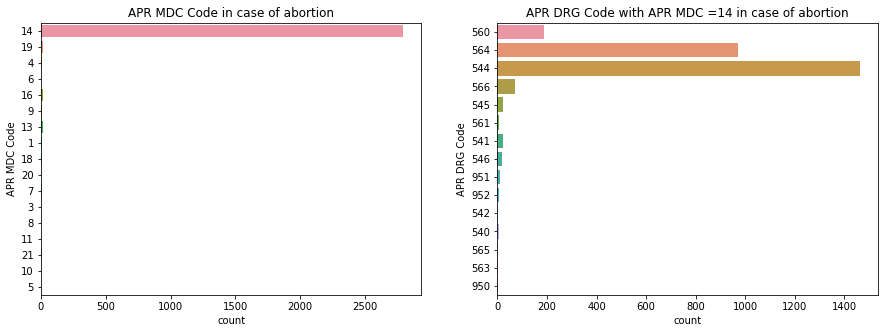

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data = abortion_df, y = 'APR MDC Code', orient='v', ax=axs[0])

# for index, value in enumerate(abortion_df['APR MDC Code'].value_counts()):
#     axs[0].text(value, index, str(value))

axs[0].title.set_text('APR MDC Code in case of abortion')
sns.countplot(data = abortion_df.loc[abortion_df['APR MDC Code']=='14'], y = 'APR DRG Code', ax = axs[1])

# for index, value in enumerate(abortion_df.loc[abortion_df['APR MDC Code']=='14', 'APR DRG Code'].value_counts()):
#     axs[1].text(value, index, str(value))

axs[1].title.set_text('APR DRG Code with APR MDC =14 in case of abortion')
plt.show()

$\rightarrow$ Đa phần các ca có APR MDC Code là 14 và APR DRG Code là 544, 564.

Dưới đây là một số chú thích về APR MDC và APR DRG Code:

    APR MDC Code = 14 là nhóm Pregnancy, Children & Puerperim, chỉ các chẩn đoán các vấn đề liên quan đến mang thai, sinh con và thai kỳ.


|APR DRG Code | Mô tả |
|:-|:-|
|544|phá thai bằng thuốc, nạo nút hoặc cắt bỏ tử cung|
|560|sinh thường|
|564|phá thai bằng phương pháp nong nạo trong 3 tháng đầu|

**Nơi thực hiện phẫu thuật**.

In [ ]:
abortion_df['Zip Code - 3 digits'].value_counts()

112    2911
Name: Zip Code - 3 digits, dtype: int64

$\rightarrow$ Có 50 tiểu bang được ghi nhận trong tập dữ liệu (theo như thuộc tính **Zip Code - 3 digits**) của tập dữ liệu ban đầu. Tuy nhiên đối với các ca thực hiện thủ thuật thì chúng chỉ thực hiện ở nơi có mã zip code là **112**. Mỹ là quốc gia có đạo luật nghiêm cấm thực hiện thủ thuật nạo phá thai rất khắt khe nên thủ thuật này thường chỉ được thực hiện tại một số nơi nhất định. Nên tiểu bang có mã 112 có thể là nơi tập trung các bệnh viện lớn, đầu ngành về sản phụ khoa (tương tự như bệnh viện Từ Dũ, Mekong ở thành phố HCM).

**Chi phí thực hiện loại phẫu thuật này**.

Để đảm bảo bệnh nhân không mắc các bệnh lý nền khác thì ta chỉ tập trung vào các trường hợp có chủ đích duy nhất là thực hiện loại thủ thuật này bằng cách chỉ lọc ra các ca tự đến bệnh viện (Type of Admission là "Elective"). Dưới đây là bảng thể hiện một số tính chất của dữ liệu vừa mới lọc (áp dụng với các cột có kiểu dữ liệu là "numeric").

In [ ]:
abortion_df.groupby('Type of Admission').get_group('Elective').describe()

,Total Costs,Total Charges,Birth Weight,Length of Stay
count,444.000000,444.000000,444.0,444.000000
mean,7357.778176,19956.456486,0.0,2.146396
std,8013.236710,23303.507956,0.0,2.760363
min,764.550000,1402.130000,0.0,1.000000
25%,3491.197500,8619.410000,0.0,1.000000
50%,5199.090000,13083.000000,0.0,1.000000
75%,7707.290000,20959.970000,0.0,2.000000
max,85943.080000,210136.590000,0.0,28.000000


Ta nhận thấy cột Birth Weight chỉ chứa giá trị 0 vì không có trẻ em nào được sinh ra cả.\
$\rightarrow$ Nhìn chung, tập dữ liệu đang xét không có gì bất thường.

Tiến hành trực quan hóa dữ liệu dựa trên thuộc tính Total Charges. Vì đây là thuộc tính liên tục nên ta chia nhỏ dữ liệu thành các bins để sử dụng biểu đồ cột được thuận tiện hơn.

In [ ]:
cost_dict = pd.cut(abortion_df['Total Charges'], bins=list(range(0, 210000, 5000)))
# cost_dict.value_counts()

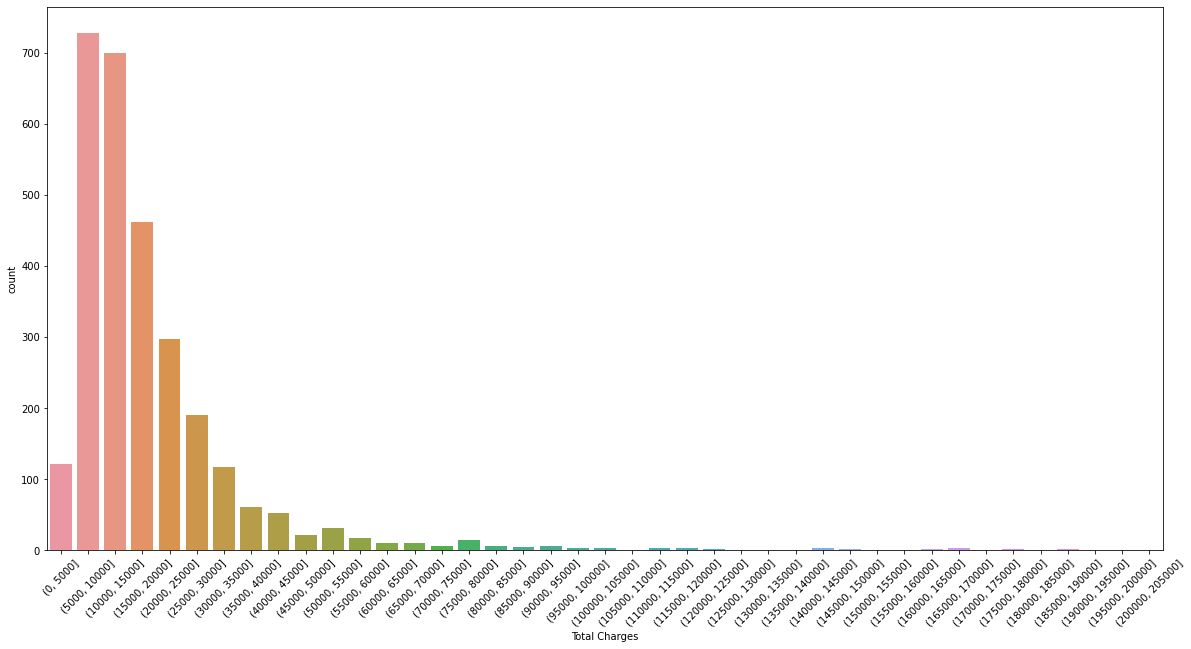

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(cost_dict)
plt.xticks(rotation=45)
plt.show()

$\rightarrow $ Chi phí thực hiện phá thai dao động vào khoảng $ 5000 - $ 30000 


**Độ tuổi**.

Dùng biểu đồ tròn để thể hiện tỉ lệ độ tuổi xuất hiện trong tập dữ liệu đang xét.

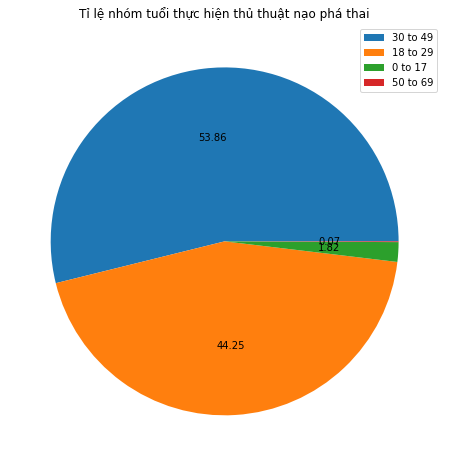

In [ ]:
plt.subplots(figsize=(10, 8))
abortion_df['Age Group'].value_counts().plot.pie(autopct='%.2f', labels=None)
plt.ylabel('')
plt.legend(abortion_df['Age Group'].unique())
plt.title('Tỉ lệ nhóm tuổi thực hiện thủ thuật nạo phá thai')
plt.show()

$\rightarrow$ Dựa vào biểu đồ trên, ta thấy đa phần người thực hiện thủ thuật này nằm trong độ tuổi sinh nở (18-49). Tuy nhiên vẫn có một vài bệnh nhân nằm ngoài độ tuổi này, đặc biệt là xảy ra  việc nạo phá thai ở trẻ vị thành niên.

**Xem xét thêm về các trường hợp ở độ tuổi vị thành niên**

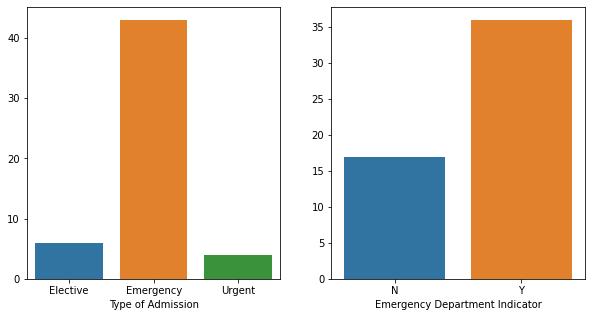

In [ ]:
teen_abortion = abortion_df.groupby('Age Group').get_group('0 to 17')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(teen_abortion['Type of Admission'], ax=axs[0])
axs[0].set(ylabel ='')
sns.countplot(teen_abortion['Emergency Department Indicator'],ax = axs[1])
axs[1].set(ylabel ='')
plt.show()

- Biểu đồ bên trái thể hiện số lượng ca bệnh nhập viện dựa trên các hình thức. Elective chỉ việc người bệnh tự đến khám và chữa bệnh tại các cơ sở y tế. Emergency và Ugent nhìn chung đều chỉ tình trạng cấp cứu khi nhập viện.
- Biểu đồ bên phải thể hiện số lượng các ca có chỉ số cấp cứu. Dễ dàng thấy được số ca có chỉ số cấp cứ gấp đôi số ca không có chỉ số cấp cứu.

$\rightarrow $ Đa số các trường hợp này đều được đưa vào viện trong tình trạng nguy kịch, có thể do không biết bản thân mang thai, không cẩn thận dẫn đến tình trạng nguy kịch hoặc cố tình bị thương để được phá thai.

### Ý nghĩa khi trả lời được câu hỏi

- Mỹ là một trong những quốc gia có quy định nghiêm ngặt về việc thực hiện nạo phá thai, đặc biệt là ở trẻ vị thành niên. Việc này cần thông qua quy trình thăm khám, tư vấn tâm lý nghiêm ngặt cũng như có chi phí cực kỳ đắt đỏ và chỉ được phép thực hiện ở một số nơi nhất định.
- Cần có biện pháp giáo dục tốt hơn để hạn chế trường hợp mang thai ở tuổi vị thành niên. Chính phủ cũng nên xem xét nhiều hơn về việc nơi lỏng chính sách liên quan tới đạo luật cấm nạo phá thai ở bang cũng như về chính sách hỗ trợ người bắt buộc phải sử dụng thủ thuật này.
